In [ ]:
import pandas as pd

# I started off by loading one file to test
df = pd.read_csv("Chicago_Crimes_2012_to_2017.csv", on_bad_lines="skip", low_memory=False)

# I then chose a random sample: 40,000 rows per year
df = df.groupby('Year').apply(lambda x: x.sample(min(len(x), 40000), random_state=42)).reset_index(drop=True)

# I had to check the dimensions and first rows to ensure that the file is loading well
print("Rows, Columns:", df.shape)
df.head()

Rows, Columns: (211357, 23)


/var/folders/67/r5d66qwx50q_3m1yfs4h03cr0000gn/T/ipykernel_51388/834953948.py:7: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('Year').apply(lambda x: x.sample(min(len(x), 40000), random_state=42)).reset_index(drop=True)


,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,2511784,8588974,HV258141,04/16/2012 11:30:00 AM,055XX S TALMAN AVE,1305,CRIMINAL DAMAGE,CRIMINAL DEFACEMENT,APARTMENT,False,...,16.0,63.0,14,1159648.0,1867825.0,2012,02/04/2016 06:33:39 AM,41.793025,-87.690125,"(41.793025004, -87.690125172)"
1,2529480,8618384,HV290410,05/17/2012 10:43:00 AM,106XX S HALSTED ST,4387,OTHER OFFENSE,VIOLATE ORDER OF PROTECTION,SIDEWALK,False,...,34.0,73.0,26,1172863.0,1834394.0,2012,02/04/2016 06:33:39 AM,41.701004,-87.642651,"(41.701004467, -87.642651258)"
2,2698206,8881218,HV553246,11/05/2012 12:00:00 PM,097XX S LOWE AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENTIAL YARD (FRONT/BACK),False,...,21.0,73.0,14,1173688.0,1840323.0,2012,02/04/2016 06:33:39 AM,41.717256,-87.639455,"(41.717256314, -87.639455463)"
3,2463659,8511578,HV188566,03/07/2012 12:00:00 AM,020XX W 70TH ST,0841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,...,17.0,67.0,06,1163946.0,1858232.0,2012,02/04/2016 06:33:39 AM,41.766611,-87.674634,"(41.76661122, -87.674634274)"
4,2419161,8440682,HV118630,01/15/2012 12:30:00 AM,079XX S MAY ST,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,...,17.0,71.0,14,1170029.0,1852200.0,2012,02/04/2016 06:33:39 AM,41.749929,-87.652513,"(41.74992863, -87.652512715)"


In [ ]:
# I looked at the basic structure of my raw data
print("Rows, Columns:", df.shape)
print("\nColumn names:")
print(df.columns)

# I then checked what the data types are
print("\nData types:")
print(df.dtypes)

# I then got a quick summary to better understand my data frame
df.info()


Rows, Columns: (211357, 23)

Column names:
Index(['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

Data types:
Unnamed: 0                int64
ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                float64
Ward                    float64
Community Area          float64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                    

In [ ]:
# I convert the raw data's dates to the right explicit format that can be perceived as code
df['Date'] = pd.to_datetime(df['Date'], format="%m/%d/%Y %I:%M:%S %p", errors="coerce")

# Then I extracted Year and Month from every date
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

In [ ]:
# I had to check for any missing values in my raw data by counting how many there are
df.isnull().sum().sort_values(ascending=False).head(10)

Location                15148
Longitude               15148
Latitude                15148
Y Coordinate            15148
X Coordinate            15148
Location Description      287
Community Area              5
Ward                        1
Unnamed: 0                  0
Updated On                  0
dtype: int64

In [ ]:
# To clean my raw data, I dropped rows missing important values
df = df.dropna(subset=['Latitude', 'Longitude', 'Location Description', 'Community Area', 'Ward'])

print("After cleaning:", df.shape)
print(df['Year'].unique())

After cleaning: (196007, 24)
[2012 2013 2014 2015 2016 2017]


Note: 2017 was excluded because the dataset only contained partial records for that year, which would give misleading results.

BELOW I WORKED ON FOUR VISUALS FOR THIS PROJECT.

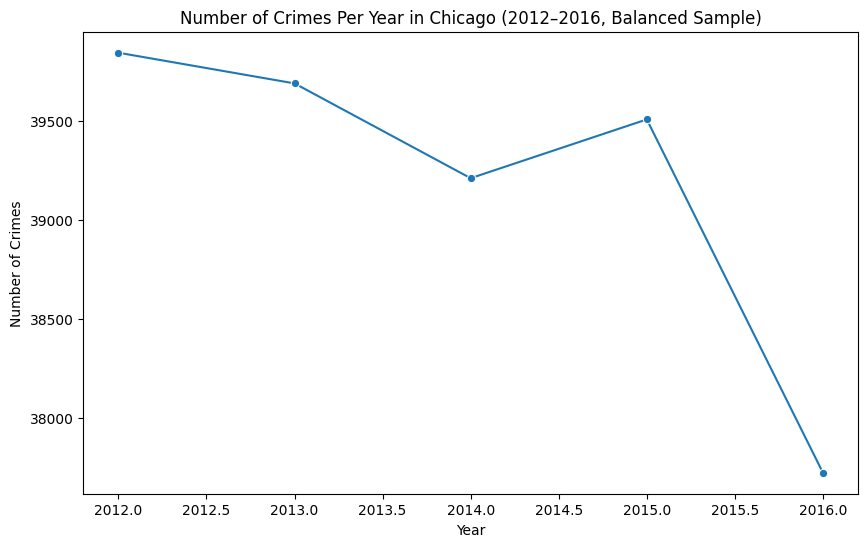

In [ ]:
# VISUAL NUMBER 1: A LINE CHART

import matplotlib.pyplot as plt
import seaborn as sns

crimes_by_year = df['Year'].value_counts().sort_index()
crimes_by_year = crimes_by_year[crimes_by_year.index != 2017]


plt.figure(figsize=(10,6))
sns.lineplot(x=crimes_by_year.index, y=crimes_by_year.values, marker="o")
plt.title("Number of Crimes Per Year in Chicago (2012–2016, Balanced Sample)")
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.show()

In [ ]:
# Before my second visual, I had to first count the Top 10 Crime Types
top_crimes = df['Primary Type'].value_counts().head(10)
print(top_crimes)

Primary Type
THEFT                  44361
BATTERY                36165
CRIMINAL DAMAGE        21108
NARCOTICS              17798
ASSAULT                12319
OTHER OFFENSE          12060
BURGLARY               11056
DECEPTIVE PRACTICE      9433
MOTOR VEHICLE THEFT     8187
ROBBERY                 7815
Name: count, dtype: int64


/var/folders/67/r5d66qwx50q_3m1yfs4h03cr0000gn/T/ipykernel_51388/1685418969.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_crimes_pct.values, y=top_crimes_pct.index, palette="viridis")


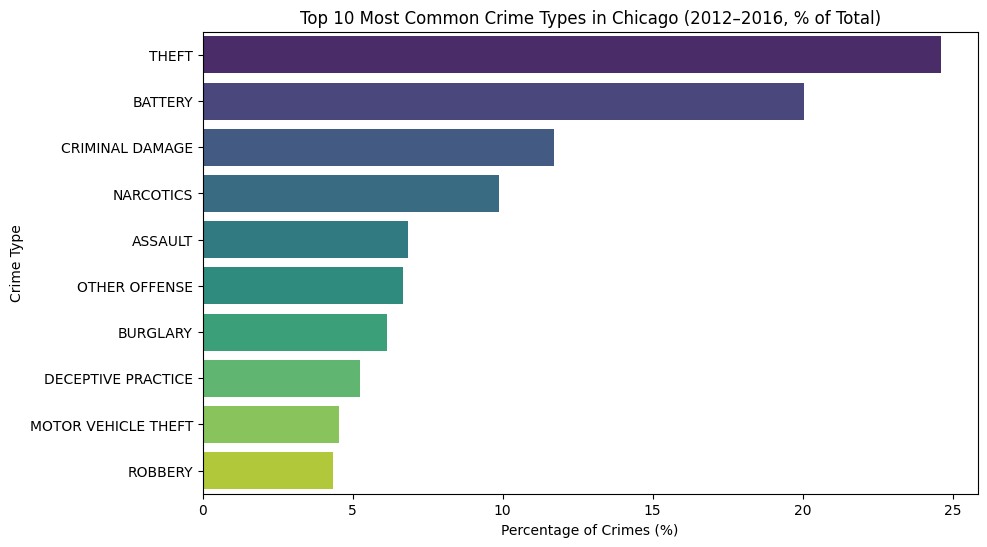

In [ ]:
# VISUAL NUMBER 2: A BAR CHART

# Below is how I got the Bar Plot of the Top 10 Crime Types in Chicago
top_crimes_pct = (top_crimes / top_crimes.sum()) * 100

plt.figure(figsize=(10,6))
sns.barplot(x=top_crimes_pct.values, y=top_crimes_pct.index, palette="viridis")
plt.title("Top 10 Most Common Crime Types in Chicago (2012–2016, % of Total)")
plt.xlabel("Percentage of Crimes (%)")
plt.ylabel("Crime Type")
plt.show()

In [ ]:
# Before working on the heatmap, I converted 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# I extracted Month and Day of Week
df['Month'] = df['Date'].dt.month
df['DayOfWeek'] = df['Date'].dt.day_name()

# I printed the result above just to check that I am using the correct data
print(df[['Date', 'Month', 'DayOfWeek']].head())

                 Date  Month  DayOfWeek
0 2012-04-16 11:30:00      4     Monday
1 2012-05-17 10:43:00      5   Thursday
2 2012-11-05 12:00:00     11     Monday
3 2012-03-07 00:00:00      3  Wednesday
4 2012-01-15 00:30:00      1     Sunday


In [ ]:
crime_pivot = df.pivot_table(index='DayOfWeek', columns='Month', values='ID', aggfunc='count')

# I had to reorder the days for clarity
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
crime_pivot = crime_pivot.reindex(days_order)

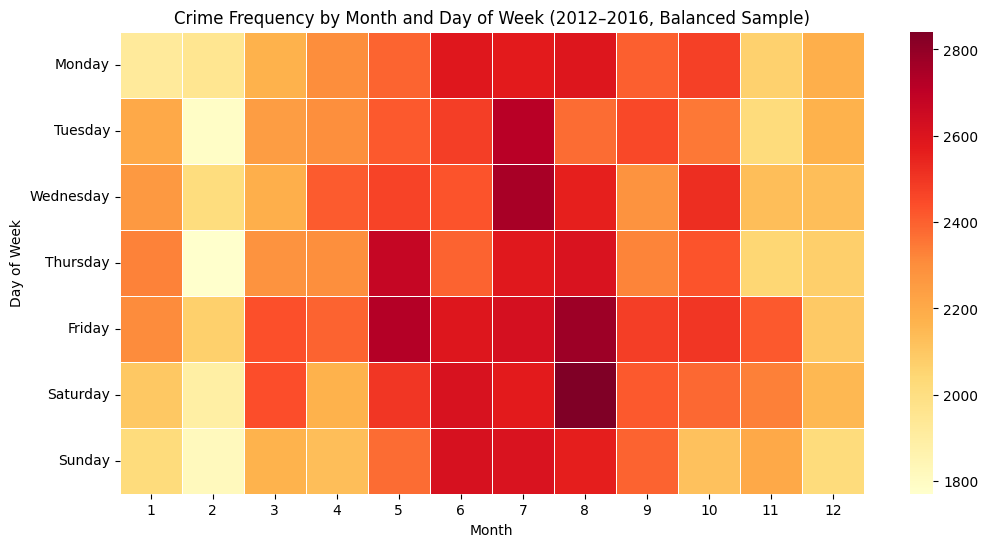

In [ ]:
# VISUAL NUMBER 3: A HEATMAP

plt.figure(figsize=(12,6))
sns.heatmap(crime_pivot, cmap="YlOrRd", linewidths=.5, annot=False)
plt.title("Crime Frequency by Month and Day of Week (2012–2016, Balanced Sample)")
plt.xlabel("Month")
plt.ylabel("Day of Week")
plt.show()

In [36]:
!pip install folium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.4/113.4 kB 1.5 MB/s eta 0:00:0031m1.4 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.4/90.4 kB 1.5 MB/s eta 0:00:00 MB/s eta 0:00:01

[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [ ]:
# VISUAL NUMBER 4: AN INTERACTIVE CRIME MAP

import folium

# I created a map centered on Chicago
chicago_map = folium.Map(location=[41.8781, -87.6298], zoom_start=11)

# I then added some crime locations (just a sample to keep it light)
sample = df.sample(500, random_state=42)  # I sampled 500 rows to keep it quick to load
for _, row in sample.iterrows():
    if pd.notnull(row['Latitude']) and pd.notnull(row['Longitude']):
        folium.CircleMarker(
            location=[row['Latitude'], row['Longitude']],
            radius=2,
            color="red",
            fill=True,
            fill_opacity=0.5
        ).add_to(chicago_map)

# I finally saved the map to this file
chicago_map.save("chicago_crime_map.html")
